In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [131]:
pd.pandas.set_option('display.max_columns', None)

In [132]:
EQ_df = pd.read_csv("earthquake_data.csv")

In [133]:
EQ_df.head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.0,22-11-2022 02:03,8,7,green,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.596,"Malango, Solomon Islands",Oceania,Solomon Islands
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.9,18-11-2022 13:37,4,4,green,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.738,"Bengkulu, Indonesia",NaN,NaN
2,M 7.0 -,7.0,12-11-2022 07:09,3,3,green,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.346,NaN,Oceania,Fiji
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.3,11-11-2022 10:48,5,5,green,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.129,"Neiafu, Tonga",NaN,NaN
4,M 6.6 -,6.6,09-11-2022 10:14,0,2,green,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.278,NaN,NaN,NaN


In [134]:
EQ_df.shape

(782, 19)

In [135]:
EQ_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      782 non-null    object 
 1   magnitude  782 non-null    float64
 2   date_time  782 non-null    object 
 3   cdi        782 non-null    int64  
 4   mmi        782 non-null    int64  
 5   alert      415 non-null    object 
 6   tsunami    782 non-null    int64  
 7   sig        782 non-null    int64  
 8   net        782 non-null    object 
 9   nst        782 non-null    int64  
 10  dmin       782 non-null    float64
 11  gap        782 non-null    float64
 12  magType    782 non-null    object 
 13  depth      782 non-null    float64
 14  latitude   782 non-null    float64
 15  longitude  782 non-null    float64
 16  location   777 non-null    object 
 17  continent  206 non-null    object 
 18  country    484 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 1

In [136]:
EQ_df.describe()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,6.941125,4.333760,5.964194,0.388747,870.108696,230.250639,1.325757,25.038990,75.883199,3.538100,52.609199
std,0.445514,3.169939,1.462724,0.487778,322.465367,250.188177,2.218805,24.225067,137.277078,27.303429,117.898886
min,6.500000,0.000000,1.000000,0.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000
25%,6.600000,0.000000,5.000000,0.000000,691.000000,0.000000,0.000000,14.625000,14.000000,-14.595600,-71.668050
50%,6.800000,5.000000,6.000000,0.000000,754.000000,140.000000,0.000000,20.000000,26.295000,-2.572500,109.426000
75%,7.100000,7.000000,7.000000,1.000000,909.750000,445.000000,1.863000,30.000000,49.750000,24.654500,148.941000
max,9.100000,9.000000,9.000000,1.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000


# Data preprocessing

In [137]:
features = ["magnitude", "depth", "cdi", "mmi", "magType", "sig", "depth", "alert"]

In [138]:
EQ_df = EQ_df[features]

In [139]:
EQ_df.isnull().sum()

magnitude      0
depth          0
cdi            0
mmi            0
magType        0
sig            0
depth          0
alert        367
dtype: int64

In [140]:
EQ_df["alert"] = EQ_df["alert"].fillna("red")

In [141]:
EQ_df.duplicated().sum()

np.int64(9)

In [142]:
EQ_df = EQ_df.drop_duplicates()

In [143]:
EQ_df.shape

(773, 8)

# EDA

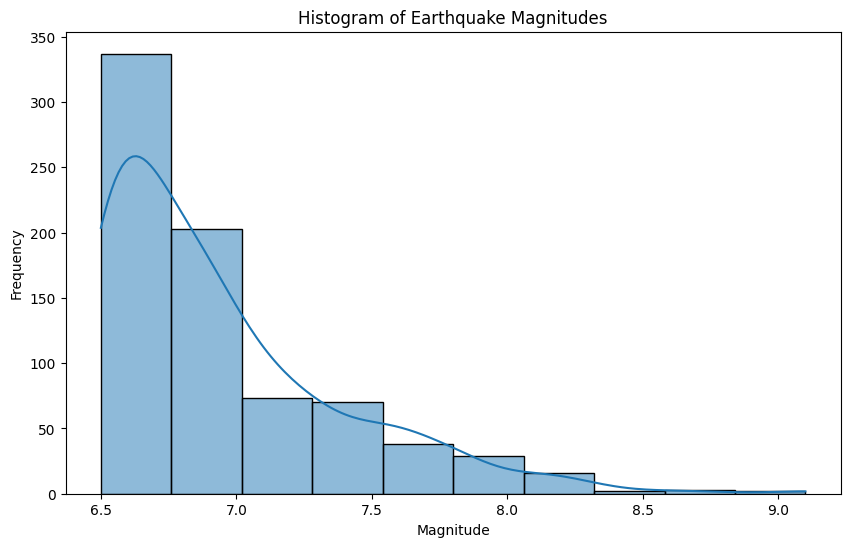

In [144]:
# Histogram of earthquake magnitudes
plt.figure(figsize=(10, 6))
sns.histplot(EQ_df['magnitude'], bins=10, kde=True)
plt.title('Histogram of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

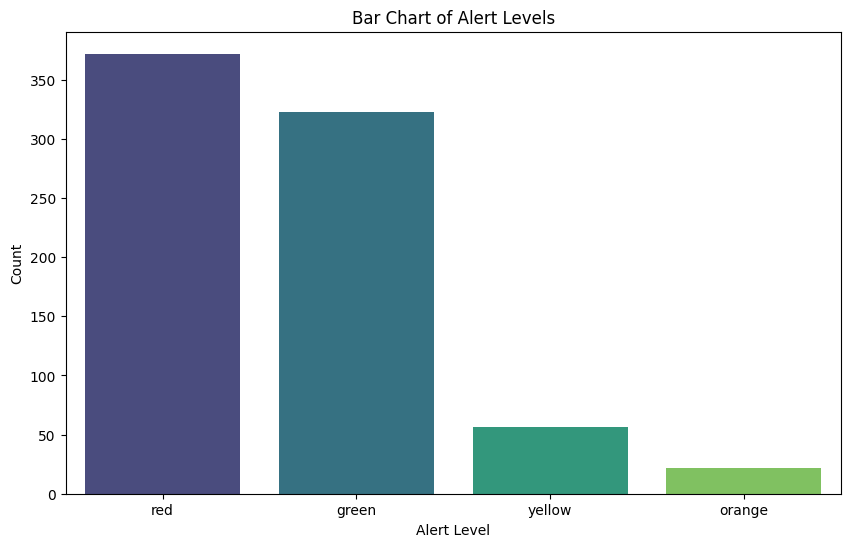

In [145]:
# Bar chart of alert levels
plt.figure(figsize=(10, 6))
alert_counts = EQ_df['alert'].value_counts()
sns.barplot(x=alert_counts.index, y=alert_counts.values, palette='viridis')
plt.title('Bar Chart of Alert Levels')
plt.xlabel('Alert Level')
plt.ylabel('Count')
plt.show()

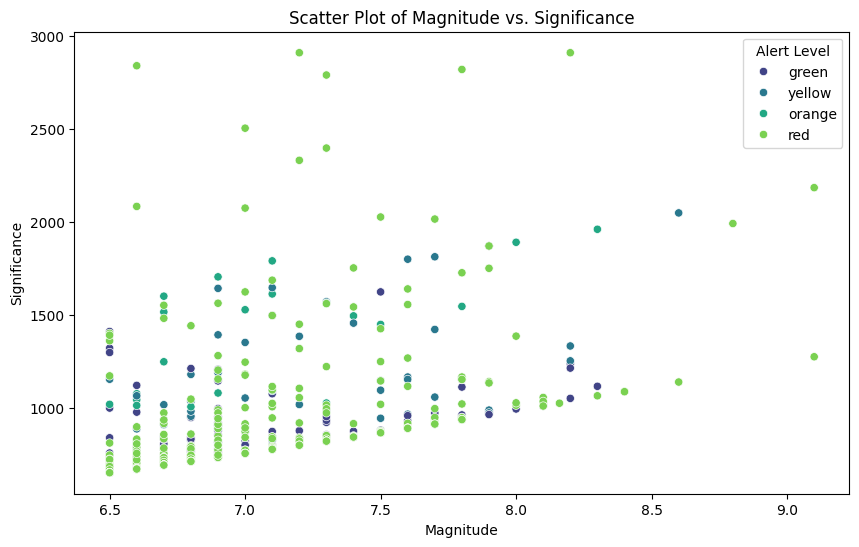

In [146]:
# Scatter plot of magnitude versus significance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='magnitude', y='sig', data=EQ_df, hue='alert', palette='viridis')
plt.title('Scatter Plot of Magnitude vs. Significance')
plt.xlabel('Magnitude')
plt.ylabel('Significance')
plt.legend(title='Alert Level')
plt.show()

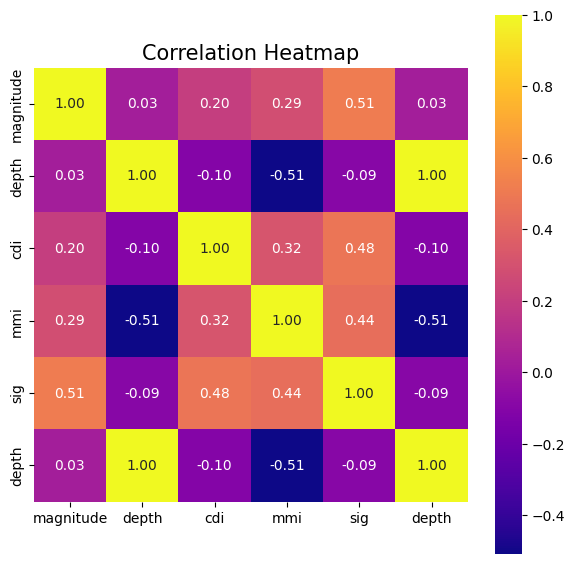

In [147]:
plt.figure(figsize=(7,7))
sns.heatmap(EQ_df.select_dtypes(include=[float, int]).corr(), vmax =1.0, fmt='0.2f', square = True, annot = True,cmap='plasma' )
plt.title('Correlation Heatmap',fontsize=15)
plt.show()

In [148]:
# Selecting features
features = ["magnitude", "depth", "cdi", "mmi", "magType", "sig", "depth", "alert"]
EQ_df = EQ_df[features]

In [149]:
# Encode categorical variables
le = LabelEncoder()
EQ_df['magType'] = le.fit_transform(EQ_df['magType'])
EQ_df['alert'] = le.fit_transform(EQ_df['alert']) 

In [150]:
# Splitting the data into features and target
X = EQ_df.drop("alert", axis=1)
y = EQ_df['alert']

In [151]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [152]:
# Initialize models
nb_model = GaussianNB()

In [153]:
# Train Naive Bayes
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

In [154]:
# Accuracy
nb_accuracy = accuracy_score(y_test, nb_pred)
print(f"Naive Bayes Accuracy: {nb_accuracy:.4f}")

Naive Bayes Accuracy: 0.5345


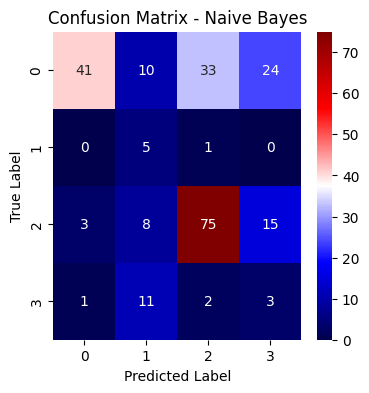

In [155]:
# Confusion Matrix
nb_cm = confusion_matrix(y_test, nb_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(nb_cm, annot=True, fmt="d", cmap="seismic", xticklabels=['0', '1', '2', '3'],
            yticklabels=['0', '1', '2', '3'])
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
    


In [156]:
# Classification Report
nb_cr = classification_report(y_test, nb_pred)
print(f"Naive Bayes Classification Report:\n {nb_cr}")

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.38      0.54       108
           1       0.15      0.83      0.25         6
           2       0.68      0.74      0.71       101
           3       0.07      0.18      0.10        17

    accuracy                           0.53       232
   macro avg       0.45      0.53      0.40       232
weighted avg       0.73      0.53      0.57       232



In [157]:
rf_model = RandomForestClassifier(random_state=42)

In [158]:
# Train Random Forest
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [159]:
# Accuracy
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

Random Forest Accuracy: 0.8448


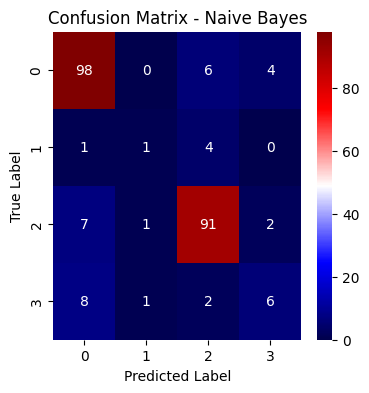

In [160]:
# Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="seismic", xticklabels=['0', '1', '2', '3'],
            yticklabels=['0', '1', '2', '3'])
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
    

In [161]:
# Classification Report
rf_cr = classification_report(y_test, rf_pred)
print(f"Random Forest Classification Report:\n {rf_cr}")

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.91      0.88       108
           1       0.33      0.17      0.22         6
           2       0.88      0.90      0.89       101
           3       0.50      0.35      0.41        17

    accuracy                           0.84       232
   macro avg       0.64      0.58      0.60       232
weighted avg       0.83      0.84      0.84       232



In [162]:
gb_model = GradientBoostingClassifier(random_state=42)

In [163]:
# Train Gradient Boosting
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

In [164]:
# Accuracy
gb_accuracy = accuracy_score(y_test, gb_pred)
print(f"Gradient Boosting Accuracy: {gb_accuracy:.4f}")

Gradient Boosting Accuracy: 0.8448


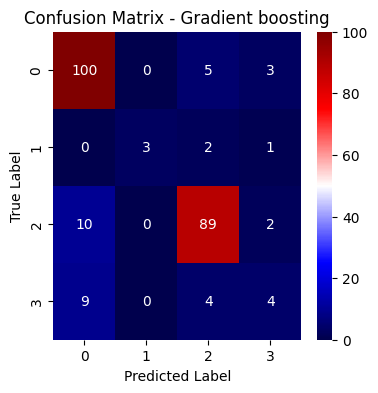

In [165]:
# Confusion Matrix
gb_cm = confusion_matrix(y_test, gb_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(gb_cm, annot=True, fmt="d", cmap="seismic", xticklabels=['0', '1', '2', '3'],
            yticklabels=['0', '1', '2', '3'])
plt.title("Confusion Matrix - Gradient boosting")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
    

In [166]:
# Classification Report
gb_cr = classification_report(y_test, gb_pred)
print(f"Gradient Boosting Classification Report:\n {gb_cr}")

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88       108
           1       1.00      0.50      0.67         6
           2       0.89      0.88      0.89       101
           3       0.40      0.24      0.30        17

    accuracy                           0.84       232
   macro avg       0.78      0.64      0.68       232
weighted avg       0.83      0.84      0.83       232



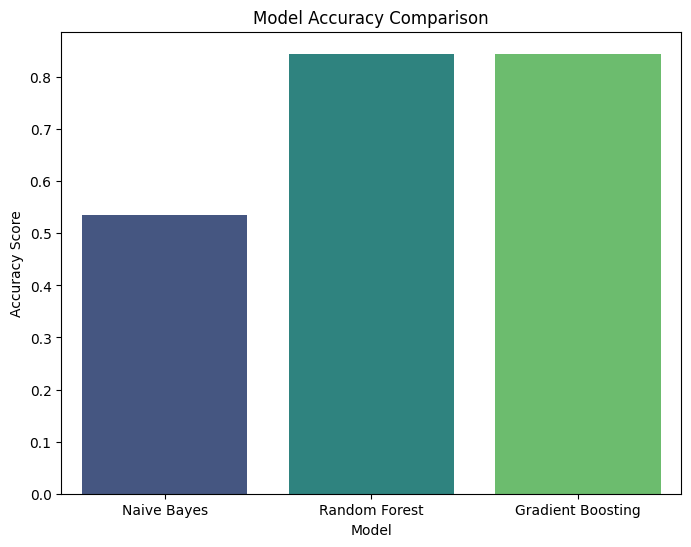

In [167]:
# Comparison of models by accuracy
accuracy_scores = {
    "Naive Bayes": nb_accuracy,
    "Random Forest": rf_accuracy,
    "Gradient Boosting": gb_accuracy
}

# Plotting accuracy comparison
plt.figure(figsize=(8, 6))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy Score')
plt.xlabel('Model')
plt.show()

# Hyperparameter for best model

In [168]:
# Hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],         
    'max_depth': [None, 10, 20, 30],        
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],           
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]            
}

In [169]:
# Initialize Random Forest model
rf_model_ht = RandomForestClassifier(random_state=42)

In [170]:
# Perform Grid Search with Cross Validation
grid_search = GridSearchCV(estimator=rf_model_ht, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

In [171]:
# Fit the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=2)

In [172]:
# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Best Cross-Validation Accuracy: 0.8078831124702684


In [173]:
# Make predictions using the best estimator
best_rf_model_ht = grid_search.best_estimator_
rf_pred_ht = best_rf_model_ht.predict(X_test)

In [174]:
# Accuracy
rf_accuracy_ht = accuracy_score(y_test, rf_pred_ht)
print(f"Optimized Random Forest Accuracy: {rf_accuracy_ht:.4f}")

Optimized Random Forest Accuracy: 0.8319


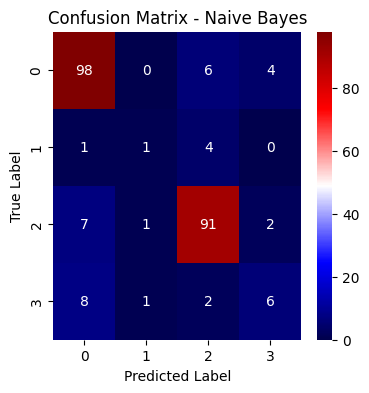

In [175]:
# Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="seismic", xticklabels=['0', '1', '2', '3'],
            yticklabels=['0', '1', '2', '3'])
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
    

In [176]:
# Classification Report
rf_cr_ht = classification_report(y_test, rf_pred_ht)
print(f"Optimized Random Forest Classification Report:\n {rf_cr_ht}")

Optimized Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88       108
           1       0.33      0.17      0.22         6
           2       0.88      0.85      0.86       101
           3       0.47      0.41      0.44        17

    accuracy                           0.83       232
   macro avg       0.63      0.59      0.60       232
weighted avg       0.82      0.83      0.83       232

